In [48]:
#Настройка предупреждений
import warnings
warnings.simplefilter('ignore')

#Отображение графиков в самом jupyter
%pylab inline

#Увеличиваем дефолтный размер графиков
from pylab import rcParams
rcParams['figure.figsize'] = 8, 5

import pandas as pd
import seaborn as sns

Populating the interactive namespace from numpy and matplotlib


In [49]:
df = pd.read_csv('C:\PyCharmProjects\practice\data\stat_synthetic.csv',sep=';')
df.shape

(44929, 5)

In [50]:
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44929 entries, 0 to 44928
Data columns (total 5 columns):
id                    42559 non-null float64
category_path         44929 non-null object
expected_img_count    44929 non-null int64
real_img_count        42559 non-null float64
synthetic_data        2370 non-null object
dtypes: float64(2), int64(1), object(2)
memory usage: 1.7+ MB


,id,category_path,expected_img_count,real_img_count,synthetic_data
0,2231239.0,D:\SCRAPED_DATA\MPK\A\A01\A01B\A01B1\A01B102,10,9.0,NaN
1,2285374.0,D:\SCRAPED_DATA\MPK\A\A01\A01B\A01B1\A01B102,4,3.0,NaN
2,2246190.0,D:\SCRAPED_DATA\MPK\A\A01\A01B\A01B1\A01B102,4,3.0,NaN
3,2218683.0,D:\SCRAPED_DATA\MPK\A\A01\A01B\A01B1\A01B102,9,8.0,NaN
4,2391802.0,D:\SCRAPED_DATA\MPK\A\A01\A01B\A01B1\A01B102,9,8.0,NaN


In [51]:
# Очистка данных:
df['synthetic_data'] = df['synthetic_data'].fillna(False)
df['real_img_count'] = df['real_img_count'].fillna(0)

In [52]:
# inplace модификация датафрейма
df['category_path'].where(df['synthetic_data']==False,df['category_path'].map(lambda _:_[20:]),inplace=True)
df['category_path'].where(df['synthetic_data']==True,df['category_path'].map(lambda _:_[20:]),inplace=True)

In [54]:
# Разделение на dataframe  с и без синтетически сгенерированной статистики
s_df = df[df['synthetic_data'] == True] 
o_df =  df[df['synthetic_data'] == False] 


In [55]:
o_df.head()

,id,category_path,expected_img_count,real_img_count,synthetic_data
0,2231239.0,A\A01\A01B\A01B1\A01B102,10,9.0,False
1,2285374.0,A\A01\A01B\A01B1\A01B102,4,3.0,False
2,2246190.0,A\A01\A01B\A01B1\A01B102,4,3.0,False
3,2218683.0,A\A01\A01B\A01B1\A01B102,9,8.0,False
4,2391802.0,A\A01\A01B\A01B1\A01B102,9,8.0,False


In [56]:
s_df.head()

,id,category_path,expected_img_count,real_img_count,synthetic_data
52,NaN,A\A01\A01B\A01B1\A01B112,105,0.0,True
53,NaN,A\A01\A01B\A01B1\A01B118,105,0.0,True
54,NaN,A\A01\A01B\A01B1\A01B124,105,0.0,True
96,NaN,A\A01\A01B\A01B15\A01B1512,46,0.0,True
110,NaN,A\A01\A01B\A01B15\A01B1520,46,0.0,True


### Ожидаемое  и  собранное число изображений

In [67]:
# Дополненный набор данных
df[['expected_img_count','real_img_count']].sum() 

expected_img_count    495293.0
real_img_count        328562.0
dtype: float64

In [85]:
# Оригинальный набор данных
o_df[['expected_img_count','real_img_count']].sum()

expected_img_count    371354.0
real_img_count        328562.0
dtype: float64

### Получение разницы между ожидаемым и реальным числом собранных изображений

In [68]:
df['count_diff'] = [row['expected_img_count'] - row['real_img_count'] for index, row  in df.iterrows()]

### Выделение основных и уникальнах категории на основе структуры пути

In [69]:
#df['category'] = [full_path.rsplit('\\')[-1] for full_path in df['category_path']]
#print(len(df.groupby('category').count()))
df['main_category'] = [full_path.rsplit('\\')[0] for full_path in df['category_path']]
print(len(df.groupby('main_category').count()))

8


### Распределение числа патентов по основным категориям
* A — УДОВЛЕТВОРЕНИЕ ЖИЗНЕННЫХ ПОТРЕБНОСТЕЙ ЧЕЛОВЕКА
* B — РАЗЛИЧНЫЕ ТЕХНОЛОГИЧЕСКИЕ ПРОЦЕССЫ; ТРАНСПОРТИРОВАНИЕ
* C — ХИМИЯ; МЕТАЛЛУРГИЯ
* D — ТЕКСТИЛЬ; БУМАГА
* E — СТРОИТЕЛЬСТВО; ГОРНОЕ ДЕЛО
* F — МАШИНОСТРОЕНИЕ; ОСВЕЩЕНИЕ; ОТОПЛЕНИЕ; ДВИГАТЕЛИ И НАСОСЫ; ОРУЖИЕ И БОЕПРИПАСЫ; ВЗРЫВНЫЕ РАБОТЫ
* G — ФИЗИКА
* H — ЭЛЕКТРИЧЕСТВО


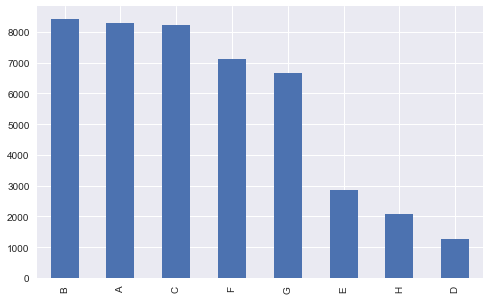

In [70]:
df['main_category'].value_counts().plot.bar()

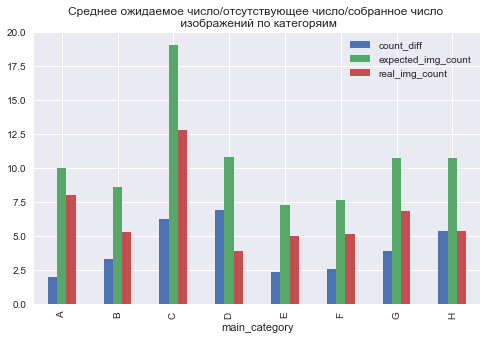

In [71]:
df.groupby('main_category')['count_diff','expected_img_count','real_img_count'].mean().plot.bar(
    title='Среднее ожидаемое число/отсутствующее число/собранное число \n изображений по категоряим')

### Сумарное число ожидаемого кол-ва изображений/ отсутсвующего кол-ва/ собранного  кол-ва изображений по категориям

In [72]:
df.pivot_table(values=['count_diff','expected_img_count','real_img_count'],index=['main_category'], aggfunc=np.sum)

,count_diff,expected_img_count,real_img_count
main_category,,,
A,16447.0,82868,66421.0
B,27853.0,72359,44506.0
C,51504.0,156678,105174.0
D,8748.0,13724,4976.0
E,6650.0,20872,14222.0
F,18116.0,54617,36501.0
G,26084.0,71624,45540.0
H,11329.0,22551,11222.0


### Полное разбиение на  категории


#### Максимальная и минимальная длина пути 

In [73]:
from operator import methodcaller
depths = df['category_path'].map(methodcaller("split", "\\")).map(len)

In [74]:
max_depth = depths.max()
min_depth = depths.min()
print(max_depth, min_depth)

6 2


In [75]:
# Подготовка  колонок для пути
for i in range(max_depth):
    df['level'+str(i)] = None

#### Вариации длин пути

In [76]:
df['category_path'].str.split('\\').map(len).value_counts()

5    41714
4     3185
3       15
6       12
2        3
Name: category_path, dtype: int64

In [77]:
### Разбиение пути на уровни с дополнением слишком коротких путей до макс.длины
tmp = df['category_path'].str.split('\\', expand=True)
df[ ['level'+str(i) for i in range(max_depth)] ] = tmp
o_df[ ['level'+str(i) for i in range(max_depth)] ] = tmp
#df.head(5)[['level'+str(i) for i in range(max_depth)]]

###  Анализ числа категорий по уровням.

#### Таблица и график числа категорий на каждом уровне, сгрупировання по основной категории.

,level1,level2,level3,level4,level5
main_category,,,,,
A,9,36,234,899,1
B,20,61,422,1573,0
C,16,49,333,1545,6
D,8,23,119,475,0
E,4,12,91,375,0
F,15,52,334,1074,0
G,10,42,219,1331,2
H,3,9,64,288,1


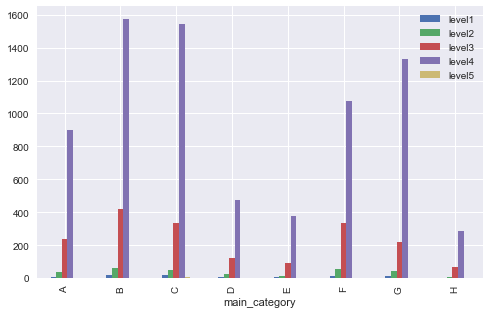

In [78]:
cols = ['level'+str(i) for i in range(1,max_depth)]

# косяк с версией pandas.
# для версии на ноуте:
df.groupby('main_category')[cols].nunique().plot.bar()
df.groupby('main_category')[cols].nunique()

# для версии на стационарнике( не доработано):
#df.groupby('main_category')['level1'].nunique()

In [79]:
# Таблица  числа категорий на каждом уровне, сгрупировання по основной категории  и первому уровню(неинтересно)
cols = ['level'+str(i) for i in range(1,max_depth)]
#df.groupby(['main_category','level1'])[cols[1:]].nunique()

### Анализ числа изображений по всем уровням разбиения.

####   Общая статистика по числу изображений по категориям первого уровня

In [80]:
level1_img_stats =  df.groupby('level1')[['expected_img_count','real_img_count']].sum()
o_level1_img_stats =  o_df.groupby('level1')[['expected_img_count','real_img_count']].sum()
level1_img_stats.agg(['min','max','mean']).T
o_level1_img_stats.agg(['min','max','mean']).T

,min,max,mean
expected_img_count,3.0,95417.0,4528.707317
real_img_count,2.0,91359.0,4006.853659


#### Описание распредления числа изображений по категориям уровня 1

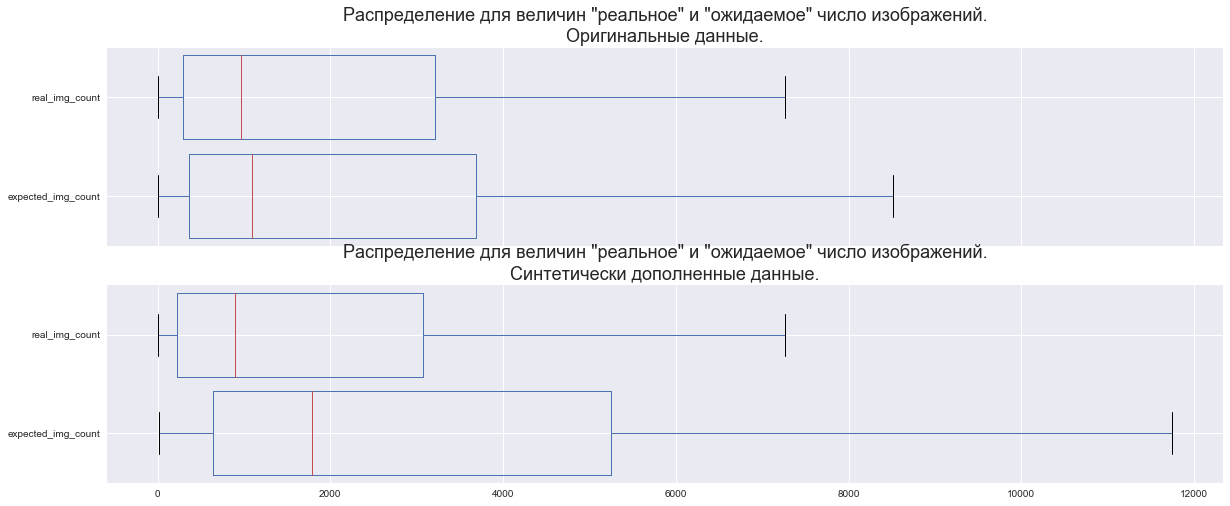

In [82]:
_, axes = plt.subplots(nrows=2, ncols=1,figsize=(20,8),sharex=True)
#sns.boxplot(x='expected_img_count', data=level1_img_stats)
o_level1_img_stats.plot.box(widths=0.85,vert=False,showfliers=False, 
                          flierprops={'markersize':5, 'marker':'o', 'markerfacecolor':'green'},
                          ax=axes[0]
                         )
level1_img_stats.plot.box(widths=0.85,vert=False,showfliers=False, 
                          flierprops={'markersize':5, 'marker':'o', 'markerfacecolor':'green'},
                          ax=axes[1]
                         )

axes[0].set_title('Распределение для величин "реальное" и "ожидаемое" число изображений.\nОригинальные данные.',
                  size=18)
axes[1].set_title('Распределение для величин "реальное" и "ожидаемое" число изображений.\nСинтетически дополненные данные.', 
                  size=18)

** Неясно почему слегка изменился ящик, отображающий распределение реального числа изображений. Статистика по нему не менялась и общее кол-во осталось прежним(было показано выше)**

#### Выводы по диаграммам размаха:
***
Синтетически дополненные  данные:
##### 1) Ожидаемое число изображений по категориям:
* половина  категорий первого уровня будет содержать  не менее ~1800 изображений
* четверть категорий первого уровня будет содержать от ~600 до 1800 изображений (2 квартиль)
* четверть категорий первого уровня будеть содержать  от ~ 1800 до ~5200 изображений(3 квартиль)
***
##### 2) Собранное число изображений по категориям:
* половина  категорий первого уровня уже содержит  не менее 800 изображений
* четверть категорий первого уровня уже содержит от ~200 до 800 изображений ( 2 квартиль)
* четверть категорий первого уровня уже содержат  от ~ 800 до 3200 изображений ( 3 квартиль)
****

#### Топ 5 категорий первого уровня по реальному числу собранных изображений

In [87]:
# Оригинальные и синтетические данные
level1_img_stats.sort_values('real_img_count', ascending=False).head(5)                                                        

,expected_img_count,real_img_count
level1,,
C07,122338,91359.0
A61,51282,42203.0
G01,37951,25830.0
A01,20826,17965.0
G06,17826,11485.0


In [88]:
# Оригинальные данные
o_level1_img_stats.sort_values('real_img_count', ascending=False).head(5)

,expected_img_count,real_img_count
level1,,
C07,95417,91359.0
A61,47654,42203.0
G01,29807,25830.0
A01,19669,17965.0
G06,12339,11485.0
